# $$Computational Physics Lab-4$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) Guass-Seidel method

***a) Write a code to see if a matrix is diaoganally dominant***

In [2]:
def dominant(a):
    m,n=np.shape(a)
    flag=0
    for i in range(m):
        if((np.sum(abs(a[i]))-abs(a[i][i]))>abs(a[i][i])):
            print(f"Not strictly diagonally dominant on row {i+1}")
            flag=-1
      
    if(flag==0):
        return 'Dominant Matrix'

In [3]:
A=np.array([[-6,2,1,2,1],[3,8,-4,1,0],[-1,1,4,10,1],[3,-4,1,9,2],[2,0,1,3,10]])

In [4]:
dominant(A)

Not strictly diagonally dominant on row 3
Not strictly diagonally dominant on row 4


***b) Write a code for solving this equation using Gauss-Seidel method in which the convergence is achieved if error limit in successive iteration is within 0.001.***

In [5]:
def guass_sidel(A,b,x):
    n=len(b)
    error=1
    x_prev=x
    
    while(error>1e-3):
        for i in range(n):
            x_prev=np.copy(x)
            s=0
            for j in range(n):
                if(i!=j):
                    s+=A[i][j]*x[j]
            
            x[i]=(b[i]-s)/A[i][i]
        error=max(abs(x_prev-x))
                   
    return x

In [6]:
A=np.array([[-6,2,1,2,1],[3,8,-4,1,0],[-1,1,4,10,1],[3,-4,1,9,2],[2,0,1,3,10]])
b=np.array([3,4,-2,12,1])
x=np.zeros(len(b))

In [7]:
print(guass_sidel(A,b,x))

[-1.11670559 -1.38589074 -4.25432104  1.49576091  0.30004495]


*Comparing it with the solution obtained by using $$x=A^{-1}b$$*

In [8]:
print(np.dot(np.linalg.inv(A),b))

[-1.1222592  -1.3890687  -4.24606829  1.49505402  0.30054246]


# 2)**Linear Interpolation 1**

***Given the three data points (x, y) = (1.0, 8.0), (2.1,
20.6) and (5.0, 13.7), write a program to return the value of y for any arbitrary x
in the range [1.0, 5.0] using two-point linear interpolation.***

***Plotting the points on the graph***

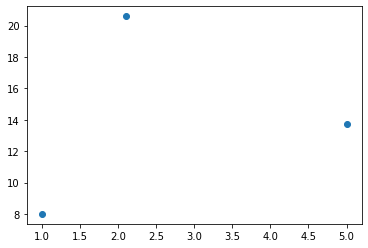

In [9]:
x=[1.0,2.1,5.0]
y=[8.0,20.6,13.7]
plt.scatter(x,y)

***Linear Interpolation function***

In [10]:
def linear_interpolation1(x,y,x_in):
    for i in range(3):
        j=1-i
        if(x_in>=x[j]):
            return (x_in-x[j])*((y[j+1]-y[j])/(x[j+1]-x[j]))+y[j]

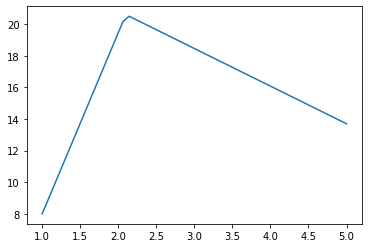

In [11]:
x_out=np.linspace(1,5,50)
y_out=np.zeros(50)
for i in range(len(x_out)):
    y_out[i]=linear_interpolation1(x,y,x_out[i])
    
plt.plot(x_out,y_out)

***Cross checking with in-built function for 2 point linear interpolation***

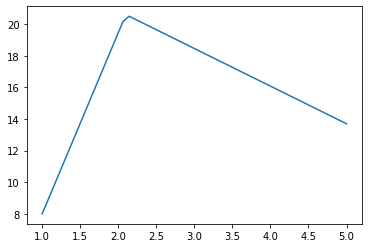

In [12]:
from scipy.interpolate import interp1d
y_out=interp1d(x,y)
x_g=np.linspace(1,5,num=50)
y_g=y_out(x_g)
plt.plot(x_g,y_g)

# 3) Linear Interpolation 2

***Given data***

In [13]:
data =pd.read_csv("points.txt")
data

,x,y
0,1.0,1.45
1,1.1,1.50
2,1.2,1.55
3,1.3,1.60
4,1.4,1.65
5,1.5,1.71
6,1.6,1.76
7,1.7,1.82
8,1.8,1.88
9,1.9,1.94


***Plotting the given points***

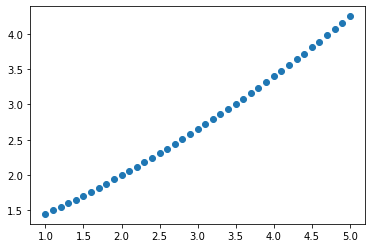

In [14]:
x=data.iloc[:,0]
y=data.iloc[:,1]
plt.scatter(x,y)

In [15]:
def linear_interpolation2(x,y,x_in):
    for i in range(len(x)):
        j=len(x)-2-i
        if(x_in>=x[j]):
            return (x_in-x[j])*((y[j+1]-y[j])/(x[j+1]-x[j]))+y[j]

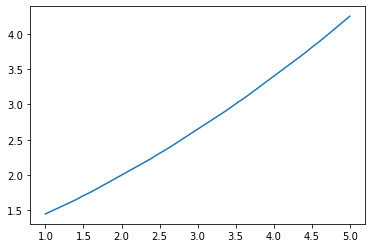

In [16]:
x_out2=np.linspace(1,5,50)
y_out2=np.zeros(50)
for i in range(len(x_out2)):
    y_out2[i]=linear_interpolation2(x,y,x_out2[i])

plt.plot(x_out2,y_out2)

***Cross checking wiht the inbuit scipy function for interpolation***

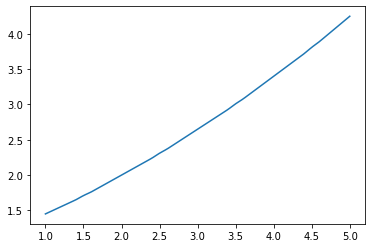

In [17]:
from scipy.interpolate import interp1d
y_out=interp1d(x,y)
x_g=np.linspace(1,5,num=100)
y_g=y_out(x_g)
plt.plot(x_g,y_g)